# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
from api_keys import w_api_key
from api_keys import g_key
import numpy as np
from pprint import pprint
from citipy import citipy
from scipy import stats
import random
import os
import csv
from datetime import datetime

csvpath = os.path.join('resource','worldcities.csv')
cities_data = pd.read_csv(csvpath)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


## Generate Cities List

In [34]:
sample_city = cities_data.sample(n=500)
sample_city

,Country,City,Latitude,Longitude
27611,ph,burgos,13.919300,121.812200
1923,bg,breznik,42.741389,22.898056
40275,th,sa kaeo,13.814111,102.072222
42257,us,citrus,34.115000,-117.890833
31215,pl,milicz,51.526373,17.276928
...,...,...,...,...
13087,ge,borjomi,41.837500,43.379167
11745,fr,le portel,50.705587,1.575745
8258,cz,sardice,48.963116,17.031360
3737,br,prainha,-1.800000,-53.483333


In [35]:
row_list =[]
  
# Iterate over each row
for index, rows in sample_city.iterrows():
    # Create list for the current row
    my_list =[rows.City]
      
    # append the list to the final list
    row_list.append(my_list)
  
flat_city_list = [] 

for sublist in row_list:
    for item in sublist:
        flat_city_list.append(item)

# Print the list
print(flat_city_list)
flat_city_df = pd.DataFrame(flat_city_list)
flat_city_df

['burgos', 'breznik', 'sa kaeo', 'citrus', 'milicz', 'cernilov', 'glauchau', 'jerantut', 'nyakahanga', 'kefalovrison', 'lomza', 'nikki', 'arroyohondo', 'malbago', 'hsinhua', 'sukaraja', 'orbottyan', 'obercorn', 'rizal', 'coronon', 'anadia', 'kharakvasla', 'ramkola', 'odintsovo', 'leones', 'dotnuva', 'kalamnuri', 'makow mazowiecki', 'parker', 'ukwa', 'greenfield', 'motru', 'delvine', 'assinovskaya', 'bollene', 'goito', 'trudarmeyskiy', 'hibaiyo', 'tavarede', 'antakya', 'luchingu', 'rusera', 'kwale', 'wynyard', 'dvur kralove', 'esik', 'kopong', 'kato skholarion', 'zomba', 'chaykovskiy', 'stratford', 'songea', 'pangkalanbuun', 'santa helena de goias', 'kirovskiy', 'verkhnyachka', 'varia', 'le robert', 'saint-pierre-des-corps', 'mapulo', 'beresti', 'dragomiresti', 'maracineni', 'warrenton', 'blonay', 'tampocon', 'barisal', 'lejamani', 'kannauj', 'orange cove', 'kaithal', 'salina', 'dragoman', 'kharagauli', 'comapa', 'webuye', 'aptos', 'hope mills', 'balc', 'mani', 'hoboken', 'utete', 'akke

,0
0,burgos
1,breznik
2,sa kaeo
3,citrus
4,milicz
...,...
495,borjomi
496,le portel
497,sardice
498,prainha


In [36]:
query_url = f"{url}appid={w_api_key}&units={units}&q="

lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
name = []

print("Beginning Data Retrieval")
print("-----------------------------")

x=0 
# Loop through the list of cities and perform a request for data on each
for city in flat_city_list:
    try:
        response = requests.get(query_url + city).json()
        y = x + 1
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print("Processing City " + str(y) + " " + response['name'])
        x = y
    except (KeyError, IndexError):
            print("The city does not exist in Openweather API")

    
print("-----------------------------")
print("Data Retrival Complate")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing City 1 Burgos
Processing City 2 Breznik
Processing City 3 Sa Kaeo
Processing City 4 Citrus
Processing City 5 Milicz
Processing City 6 Černilov
Processing City 7 Glauchau
Processing City 8 Jerantut
Processing City 9 Nyakahanga
The city does not exist in Openweather API
Processing City 10 Łomża
Processing City 11 Nikki
Processing City 12 Arroyohondo
Processing City 13 Malbago
The city does not exist in Openweather API
Processing City 14 Sukaraja
Processing City 15 Őrbottyán
Processing City 16 Obercorn
Processing City 17 Rizal
Processing City 18 Coronon
Processing City 19 Anadia
Processing City 20 Kharakvasla
Processing City 21 Rāmkola
Processing City 22 Odintsovo
Processing City 23 Leones
Processing City 24 Dotnuva
Processing City 25 Kalamnūri
Processing City 26 Maków Mazowiecki
Processing City 27 Parker
Processing City 28 Ukwā
Processing City 29 Greenfield
Processing City 30 Motru
Processing City 31 Delvinë
Processing Cit

Processing City 264 Balabac
Processing City 265 Arukutti
Processing City 266 Kalyān
Processing City 267 Villefranche-sur-Saône
Processing City 268 Ikovka
Processing City 269 Cacahoatán
Processing City 270 Lackawanna
Processing City 271 Vyksa
Processing City 272 Nangan
The city does not exist in Openweather API
Processing City 273 Alvdal
Processing City 274 Pufeşti
Processing City 275 Mendota Heights
Processing City 276 Petrila
Processing City 277 Qarqīn
Processing City 278 Cincinnati
Processing City 279 Vinh
Processing City 280 Bilimora
The city does not exist in Openweather API
Processing City 281 Palafrugell
Processing City 282 Afrikanda
Processing City 283 Alcanena
Processing City 284 Kūhdasht
Processing City 285 Lichuan
Processing City 286 Abucayan
Processing City 287 Kraainem
Processing City 288 Caetité
Processing City 289 Novikovo
Processing City 290 Tabursuq
Processing City 291 Digal
Processing City 292 Soskovo
Processing City 293 Tulu Bolo
Processing City 294 Valea Călugărească

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
cities_df = pd.DataFrame({
    "City": name,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": max_temp,
    "Humidity": humidity, 
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
    })



In [39]:
cities_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Burgos,42.3394,-3.7079,13.23,82,0,1.03,ES,1627087415
1,Breznik,42.7414,22.8981,16.33,77,1,0.32,BG,1627087238
2,Sa Kaeo,13.7500,102.3333,23.64,96,100,2.69,TH,1627087264
3,Citrus,34.1150,-117.8917,38.80,44,1,2.24,US,1627087415
4,Milicz,51.5277,17.2714,16.59,58,91,1.34,PL,1627087415
...,...,...,...,...,...,...,...,...,...
474,Borjomi,41.8527,43.4128,16.76,94,99,0.67,GE,1627087540
475,Le Portel,50.7056,1.5757,19.27,78,27,7.66,FR,1627087540
476,Šardice,48.9640,17.0281,18.18,80,0,1.60,CZ,1627087540
477,Prainha,-1.8000,-53.4800,26.01,63,98,1.65,BR,1627087541


In [40]:
cities_df

cities_df.to_csv('weather.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
cities_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Burgos,42.3394,-3.7079,13.23,82,0,1.03,ES,1627087415
1,Breznik,42.7414,22.8981,16.33,77,1,0.32,BG,1627087238
2,Sa Kaeo,13.7500,102.3333,23.64,96,100,2.69,TH,1627087264
3,Citrus,34.1150,-117.8917,38.80,44,1,2.24,US,1627087415
4,Milicz,51.5277,17.2714,16.59,58,91,1.34,PL,1627087415
...,...,...,...,...,...,...,...,...,...
474,Borjomi,41.8527,43.4128,16.76,94,99,0.67,GE,1627087540
475,Le Portel,50.7056,1.5757,19.27,78,27,7.66,FR,1627087540
476,Šardice,48.9640,17.0281,18.18,80,0,1.60,CZ,1627087540
477,Prainha,-1.8000,-53.4800,26.01,63,98,1.65,BR,1627087541


In [42]:
clean_city_df = cities_df.loc[(cities_df["Humidity"] <= 100)]
clean_city_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Burgos,42.3394,-3.7079,13.23,82,0,1.03,ES,1627087415
1,Breznik,42.7414,22.8981,16.33,77,1,0.32,BG,1627087238
2,Sa Kaeo,13.7500,102.3333,23.64,96,100,2.69,TH,1627087264
3,Citrus,34.1150,-117.8917,38.80,44,1,2.24,US,1627087415
4,Milicz,51.5277,17.2714,16.59,58,91,1.34,PL,1627087415
...,...,...,...,...,...,...,...,...,...
474,Borjomi,41.8527,43.4128,16.76,94,99,0.67,GE,1627087540
475,Le Portel,50.7056,1.5757,19.27,78,27,7.66,FR,1627087540
476,Šardice,48.9640,17.0281,18.18,80,0,1.60,CZ,1627087540
477,Prainha,-1.8000,-53.4800,26.01,63,98,1.65,BR,1627087541


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

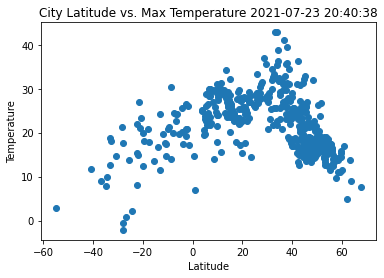

In [71]:
graph_date = clean_city_df['Date'][1]
dt_object = datetime.fromtimestamp(graph_date)
x_values = clean_city_df['Latitude']
y_values = clean_city_df['Max Temp']
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("City Latitude vs. Max Temperature " + str(dt_object)
         )
plt.savefig('Lat vs. Temp.png')
plt.show()


## Latitude vs. Humidity Plot

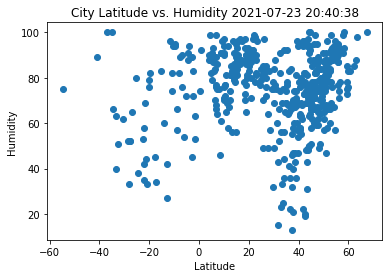

In [72]:
graph_date = clean_city_df['Date'][1]
dt_object = datetime.fromtimestamp(graph_date)
x_values = clean_city_df['Latitude']
y_values = clean_city_df['Humidity']
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity " + str(dt_object)
         )
plt.savefig('Lat vs. Humidity.png')
plt.show()


## Latitude vs. Cloudiness Plot

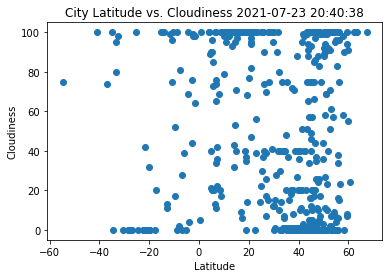

In [73]:
graph_date = clean_city_df['Date'][1]
dt_object = datetime.fromtimestamp(graph_date)
x_values = clean_city_df['Latitude']
y_values = clean_city_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness " + str(dt_object)
         )
plt.savefig('Lat vs. Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

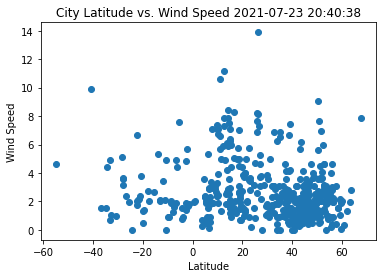

In [60]:
graph_date = clean_city_df['Date'][1]
dt_object = datetime.fromtimestamp(graph_date)
x_values = clean_city_df['Latitude']
y_values = clean_city_df['Wind Speed']
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed " + str(dt_object)
         )
plt.savefig('Lat vs. Wind Speed.png')
plt.show()


## Linear Regression

In [61]:
n_clean_city_df = cities_df.loc[(cities_df["Latitude"] > 0)]
s_clean_city_df = cities_df.loc[(cities_df["Latitude"] < 0)]


The r-value is: 0.2852382647582632


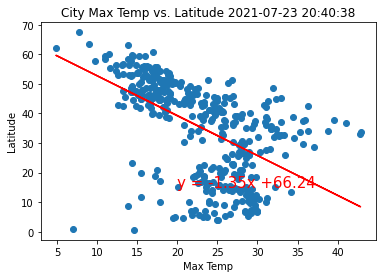

In [62]:
# Northern Hemisphere - Max Temp vs. Latitude
x_values = n_clean_city_df['Max Temp']
y_values = n_clean_city_df['Latitude']
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.title("City Max Temp vs. Latitude " + str(dt_object))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig('Northern - Max Temp vs. Lat.png')
plt.show()
          

The r-value is: 0.3719655946588333


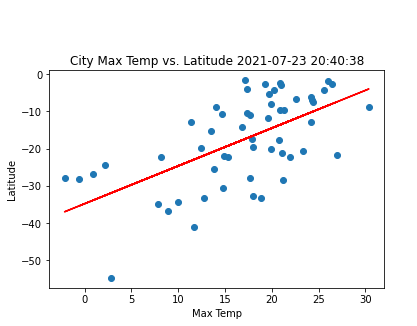

In [74]:
# Southern Hemisphere - Max Temp vs. Latitude
x_values = s_clean_city_df['Max Temp']
y_values = s_clean_city_df['Latitude']
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.title("City Max Temp vs. Latitude " + str(dt_object))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig('Southern - Max Temp vs. Lat.png')
plt.show()
          

The r-value is: 0.007394285109358125


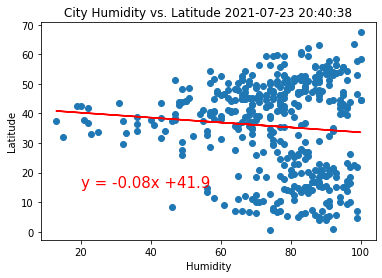

In [64]:
x_values = n_clean_city_df['Humidity']
y_values = n_clean_city_df['Latitude']
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title("City Humidity vs. Latitude " + str(dt_object))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig('Northern - Humidity vs. Lat.png')
plt.show()

The r-value is: 0.03243416613760885


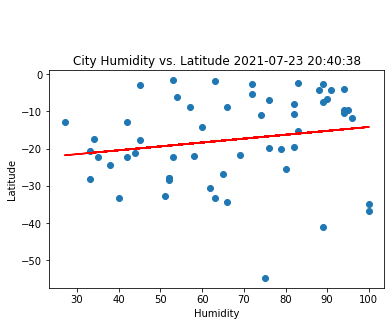

In [65]:
x_values = s_clean_city_df['Humidity']
y_values = s_clean_city_df['Latitude']
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title("City Humidity vs. Latitude " + str(dt_object))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig('Southern - Humidity vs. Lat.png')
plt.show()
          

The r-value is: 0.10567693828889076


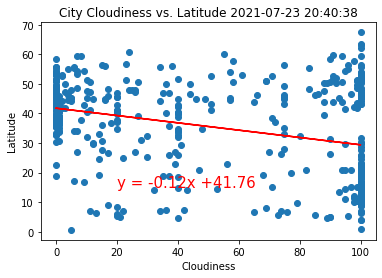

In [66]:
x_values = n_clean_city_df['Cloudiness']
y_values = n_clean_city_df['Latitude']
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("City Cloudiness vs. Latitude " + str(dt_object))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig('Northern - Cloudiness vs. Lat.png')
plt.show()


The r-value is: 0.0075416936305408855


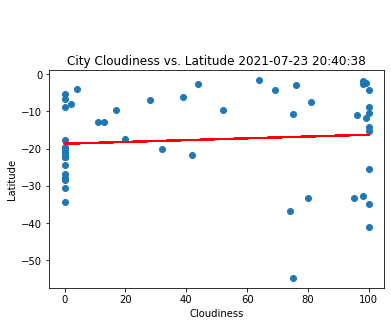

In [67]:
x_values = s_clean_city_df['Cloudiness']
y_values = s_clean_city_df['Latitude']
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("City Cloudiness vs. Latitude " + str(dt_object))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig('Southern - Cloudiness vs. Lat.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07289080900509583


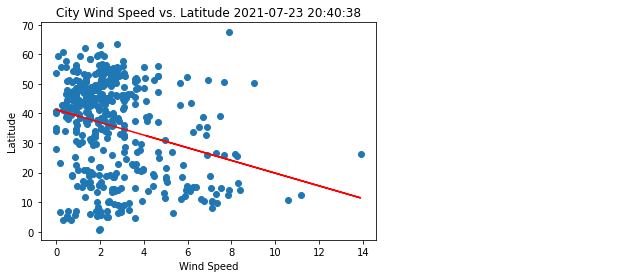

In [68]:
x_values = n_clean_city_df['Wind Speed']
y_values = n_clean_city_df['Latitude']
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title("City Wind Speed vs. Latitude " + str(dt_object))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig('Northern - Wind Speed vs. Lat.png')
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.031245465656151133


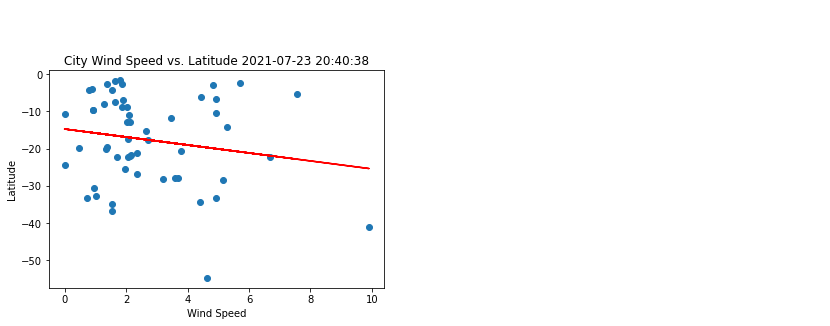

In [69]:
x_values = s_clean_city_df['Wind Speed']
y_values = s_clean_city_df['Latitude']
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title("City Wind Speed vs. Latitude " + str(dt_object))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig('Southern - Wind Speed vs. Lat.png')
plt.show()


In [ ]:
# 3 Observaable Trends: 
# Wind Speed and humnidity do not have strong relationship with latitude
# Max Temp does have a strong relationship with latitude. 
# Northern and Southern hemispheres have contrasting relationships between Max Temp and Latitude. 